In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('mall.csv')

In [3]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df=df.drop(columns=['CustomerID','Genre'])

In [6]:
df.head(2)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81


In [7]:
x=df.iloc[:,[0,1]].values

In [8]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt

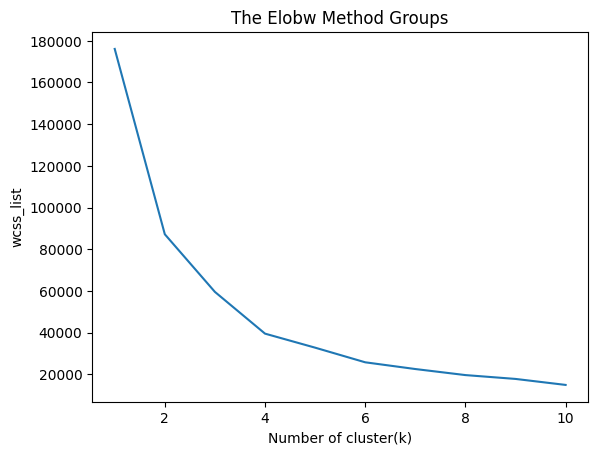

In [11]:
a=[]

for i in range(1,11):
    b=KMeans(n_clusters=i,init='k-means++',random_state=42)
    b.fit(x)
    a.append(b.inertia_)
plt.plot(range(1,11),a)

plt.title('The Elobw Method Groups')
plt.xlabel('Number of cluster(k)')
plt.ylabel('wcss_list')
plt.show()

## From the above plot , we can see the elbow points is at 4. so the number of clusters here will be 4.

In [13]:
b=KMeans(n_clusters=4,init='k-means++', random_state=42)
y_predict = b.fit_predict(x)


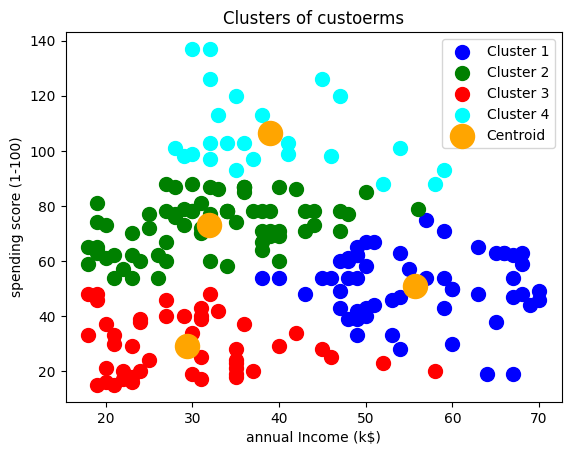

In [18]:
# visualizing the clusters 
plt.scatter(x[y_predict == 0,0],x[y_predict==0,1],s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_predict == 1,0],x[y_predict==1,1],s=100, c='green', label='Cluster 2')
plt.scatter(x[y_predict == 2,0],x[y_predict==2,1],s=100, c='red', label='Cluster 3')
plt.scatter(x[y_predict == 3,0],x[y_predict==3,1],s=100, c='cyan', label='Cluster 4')

plt.scatter(b.cluster_centers_[:,0],b.cluster_centers_[:,1],s=300,c='orange',
            label='Centroid')
plt.title('Clusters of custoerms')
plt.xlabel('annual Income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()